In [417]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
import pandas as pd
import time
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [352]:
data = pd.read_csv('train.csv')
data.head(5)

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2               NaN                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 NaN               2.0  More than 8 hours        Healthy   
1                 NaN               3.0  Less than 5 hours      Unhealthy   
2                 2.0               NaN          5-6 hours        Healthy   
3                 NaN               1.0  Less than 5 hours       Moderate   
4                 NaN               1.0          5-6 hours      Unhealthy   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0      BHM                                    No               1.0   
1      LLB                                   Yes               7.0   
2  B.Pharm                                   Yes               3.0   
3      BBA                                   Yes              10.0   
4      BBA                                   Yes               9.0   

   Financial Stress Family History of Mental Illness  Depression  
0               2.0                               No           0  
1               3.0                               No           1  
2               1.0                               No           1  
3               1.0                              Yes           1  
4               4.0                              Yes           0

In [353]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


In [354]:
data.loc[(data['Working Professional or Student'] == 'Student') & (data['Profession'].isna()), 'Profession'] = 'Student'

In [355]:
data.head(5)

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2           Student                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 NaN               2.0  More than 8 hours        Healthy   
1                 NaN               3.0  Less than 5 hours      Unhealthy   
2                 2.0               NaN          5-6 hours        Healthy   
3                 NaN               1.0  Less than 5 hours       Moderate   
4                 NaN               1.0          5-6 hours      Unhealthy   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0      BHM                                    No               1.0   
1      LLB                                   Yes               7.0   
2  B.Pharm                                   Yes               3.0   
3      BBA                                   Yes              10.0   
4      BBA                                   Yes               9.0   

   Financial Stress Family History of Mental Illness  Depression  
0               2.0                               No           0  
1               3.0                               No           1  
2               1.0                               No           1  
3               1.0                              Yes           1  
4               4.0                              Yes           0

In [356]:
data['Pressure'] = data['Academic Pressure'].combine_first(data['Work Pressure'])

data = data.drop(columns=['Academic Pressure', 'Work Pressure'])

In [357]:
data.head(5)

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  CGPA  Study Satisfaction  Job Satisfaction  \
0              Chef   NaN                 NaN               2.0   
1           Teacher   NaN                 NaN               3.0   
2           Student  8.97                 2.0               NaN   
3           Teacher   NaN                 NaN               1.0   
4  Business Analyst   NaN                 NaN               1.0   

      Sleep Duration Dietary Habits   Degree  \
0  More than 8 hours        Healthy      BHM   
1  Less than 5 hours      Unhealthy      LLB   
2          5-6 hours        Healthy  B.Pharm   
3  Less than 5 hours       Moderate      BBA   
4          5-6 hours      Unhealthy      BBA   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                    No               1.0               2.0   
1                                   Yes               7.0               3.0   
2                                   Yes               3.0               1.0   
3                                   Yes              10.0               1.0   
4                                   Yes               9.0               4.0   

  Family History of Mental Illness  Depression  Pressure  
0                               No           0       5.0  
1                               No           1       4.0  
2                               No           1       5.0  
3                              Yes           1       5.0  
4                              Yes           0       1.0

In [358]:
data['Satisfaction'] = data['Study Satisfaction'].combine_first(data['Job Satisfaction'])

data = data.drop(columns=['Job Satisfaction', 'Study Satisfaction'])

In [359]:
data.head(5)

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  CGPA     Sleep Duration Dietary Habits   Degree  \
0              Chef   NaN  More than 8 hours        Healthy      BHM   
1           Teacher   NaN  Less than 5 hours      Unhealthy      LLB   
2           Student  8.97          5-6 hours        Healthy  B.Pharm   
3           Teacher   NaN  Less than 5 hours       Moderate      BBA   
4  Business Analyst   NaN          5-6 hours      Unhealthy      BBA   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                    No               1.0               2.0   
1                                   Yes               7.0               3.0   
2                                   Yes               3.0               1.0   
3                                   Yes              10.0               1.0   
4                                   Yes               9.0               4.0   

  Family History of Mental Illness  Depression  Pressure  Satisfaction  
0                               No           0       5.0           2.0  
1                               No           1       4.0           3.0  
2                               No           1       5.0           2.0  
3                              Yes           1       5.0           1.0  
4                              Yes           0       1.0           1.0

In [360]:
data.shape

(140700, 18)

In [361]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                 8763
CGPA                                     112802
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
Pressure                                     21
Satisfaction                                 15
dtype: int64


In [362]:
data['Profession'] = data['Profession'].fillna('Unknown')

In [363]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
CGPA                                     112802
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
Pressure                                     21
Satisfaction                                 15
dtype: int64


In [364]:
count_working_professional = (data['Working Professional or Student'] == 'Working Professional').sum()
count_Students = (data['Working Professional or Student'] == 'Student').sum()

print("Count of 'Working Professional':", count_working_professional)
print("Count of 'Students':", count_Students)

Count of 'Working Professional': 112799
Count of 'Students': 27901


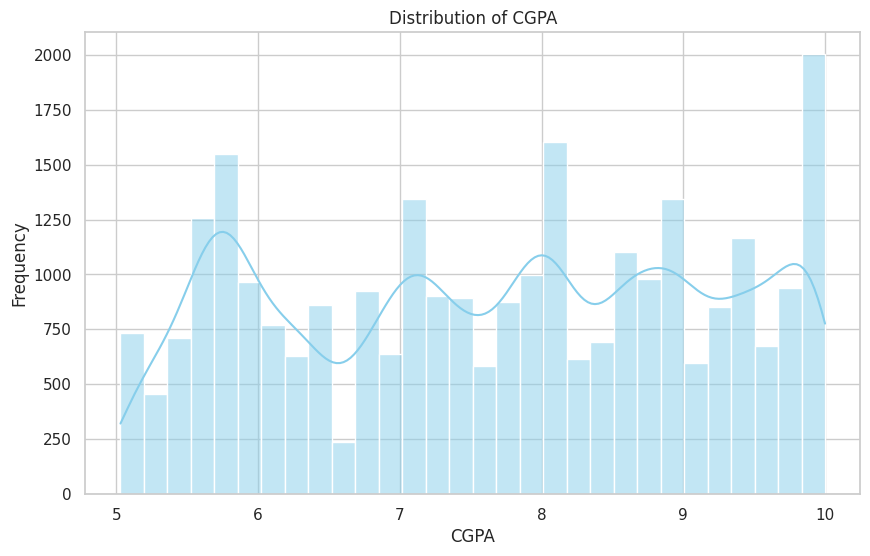

In [365]:
cgpa_data = data['CGPA'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(cgpa_data, bins=30, kde=True, color='skyblue')

plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')

plt.show()

In [366]:
median_cgpa = data['CGPA'].median()

In [367]:
data['CGPA'] = data.apply(lambda row: -1 if row['Working Professional or Student'] == "Working Professional" else row['CGPA'], axis=1)

In [368]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                        0
Name                                      0
Gender                                    0
Age                                       0
City                                      0
Working Professional or Student           0
Profession                                0
CGPA                                      9
Sleep Duration                            0
Dietary Habits                            4
Degree                                    2
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          4
Family History of Mental Illness          0
Depression                                0
Pressure                                 21
Satisfaction                             15
dtype: int64


In [369]:
cgpa_null_rows = data[data['CGPA'].isnull()]

print("Rows where CGPA is NULL:")
print(cgpa_null_rows)

Rows where CGPA is NULL:
            id      Name  Gender   Age       City  \
21880    21880    Aarush    Male  38.0    Chennai   
52737    52737     Aarav    Male  28.0   Vadodara   
58062    58062    Ishita  Female  32.0   Vadodara   
70453    70453      Veda  Female  20.0  Ahmedabad   
75007    75007     Aarav    Male  21.0    Lucknow   
105773  105773     Anand    Male  18.0  Ahmedabad   
110097  110097   Abhinav    Male  34.0       Pune   
129756  129756      Kian    Male  18.0     Rajkot   
134830  134830  Aaradhya  Female  24.0     Meerut   

       Working Professional or Student Profession  CGPA     Sleep Duration  \
21880                          Student    Student   NaN          5-6 hours   
52737                          Student    Student   NaN  Less than 5 hours   
58062                          Student    Student   NaN  Less than 5 hours   
70453                          Student    Student   NaN  Less than 5 hours   
75007                          Student    Student   Na

In [370]:
data['CGPA'] = data['CGPA'].fillna(median_cgpa)

In [371]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                        0
Name                                      0
Gender                                    0
Age                                       0
City                                      0
Working Professional or Student           0
Profession                                0
CGPA                                      0
Sleep Duration                            0
Dietary Habits                            4
Degree                                    2
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          4
Family History of Mental Illness          0
Depression                                0
Pressure                                 21
Satisfaction                             15
dtype: int64


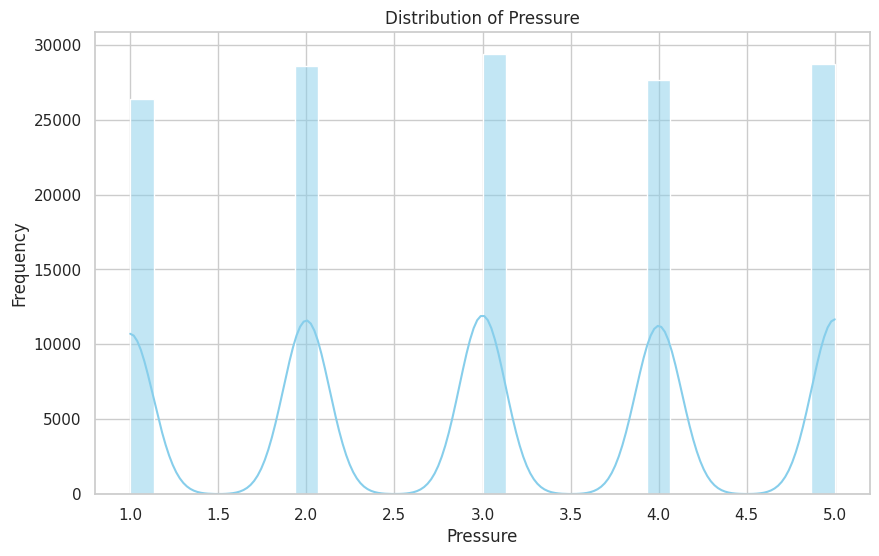

In [372]:
Pressure_data = data['Pressure'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(Pressure_data, bins=30, kde=True, color='skyblue')

plt.title('Distribution of Pressure')
plt.xlabel('Pressure')
plt.ylabel('Frequency')

plt.show()

In [373]:
median_Pressure = data['Pressure'].median()
data['Pressure'] = data['Pressure'].fillna(median_Pressure)

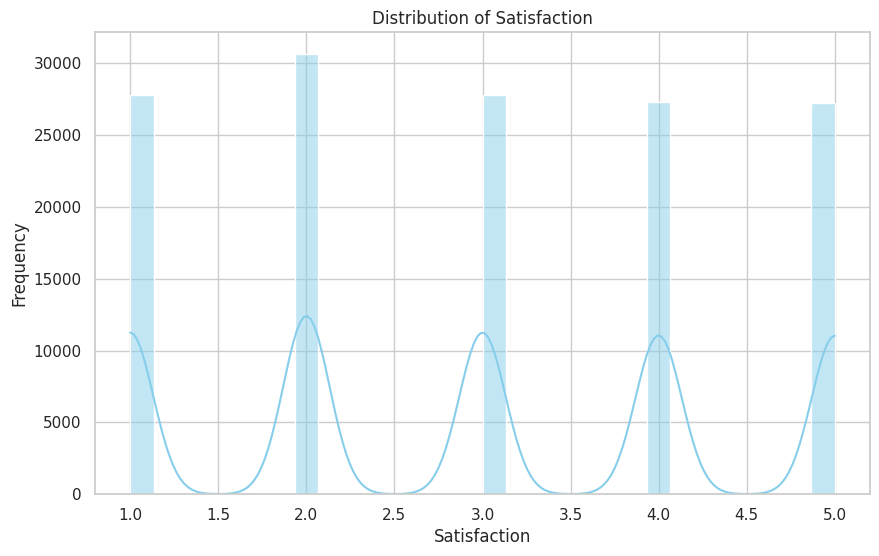

In [374]:
Satisfaction_data = data['Satisfaction'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(Satisfaction_data, bins=30, kde=True, color='skyblue')

plt.title('Distribution of Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')

plt.show()

In [375]:
median_Satisfaction = data['Satisfaction'].median()
data['Satisfaction'] = data['Satisfaction'].fillna(median_Satisfaction)

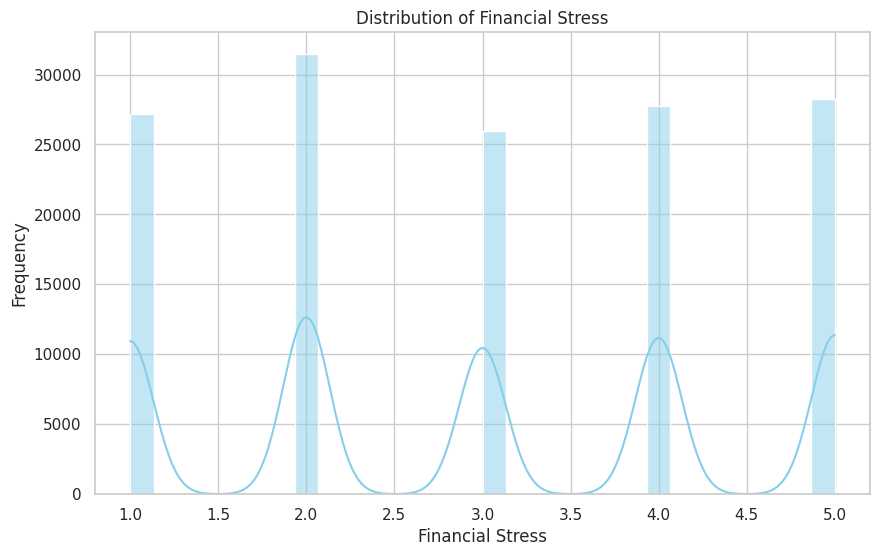

In [376]:
Financial_Stress_data = data['Financial Stress'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(Financial_Stress_data, bins=30, kde=True, color='skyblue')

plt.title('Distribution of Financial Stress')
plt.xlabel('Financial Stress')
plt.ylabel('Frequency')

plt.show()

In [377]:
median_Financial_Stress = data['Financial Stress'].median()
data['Financial Stress'] = data['Financial Stress'].fillna(median_Financial_Stress)

In [378]:
data.shape

(140700, 18)

In [379]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
CGPA                                     0
Sleep Duration                           0
Dietary Habits                           4
Degree                                   2
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Pressure                                 0
Satisfaction                             0
dtype: int64


In [380]:
data = data.dropna(axis=0)

In [381]:
data.shape

(140694, 18)

In [382]:
data.head(5)

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  CGPA     Sleep Duration Dietary Habits   Degree  \
0              Chef -1.00  More than 8 hours        Healthy      BHM   
1           Teacher -1.00  Less than 5 hours      Unhealthy      LLB   
2           Student  8.97          5-6 hours        Healthy  B.Pharm   
3           Teacher -1.00  Less than 5 hours       Moderate      BBA   
4  Business Analyst -1.00          5-6 hours      Unhealthy      BBA   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                    No               1.0               2.0   
1                                   Yes               7.0               3.0   
2                                   Yes               3.0               1.0   
3                                   Yes              10.0               1.0   
4                                   Yes               9.0               4.0   

  Family History of Mental Illness  Depression  Pressure  Satisfaction  
0                               No           0       5.0           2.0  
1                               No           1       4.0           3.0  
2                               No           1       5.0           2.0  
3                              Yes           1       5.0           1.0  
4                              Yes           0       1.0           1.0

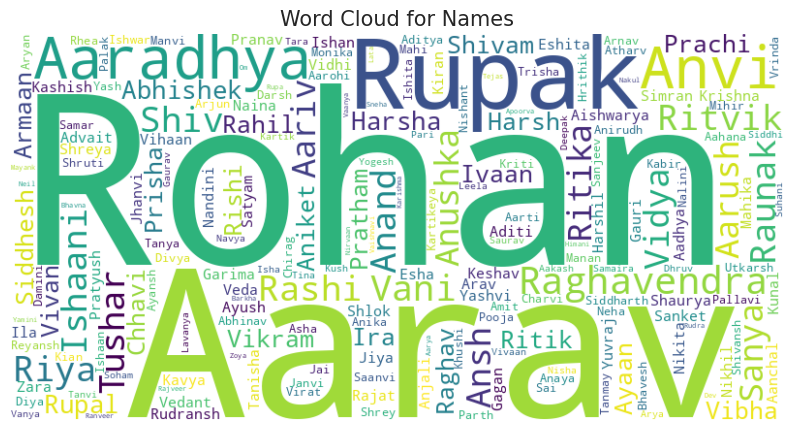

In [383]:
names_text = " ".join(data['Name'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(names_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes for a cleaner look
plt.title("Word Cloud for Names", fontsize=15)
plt.show()


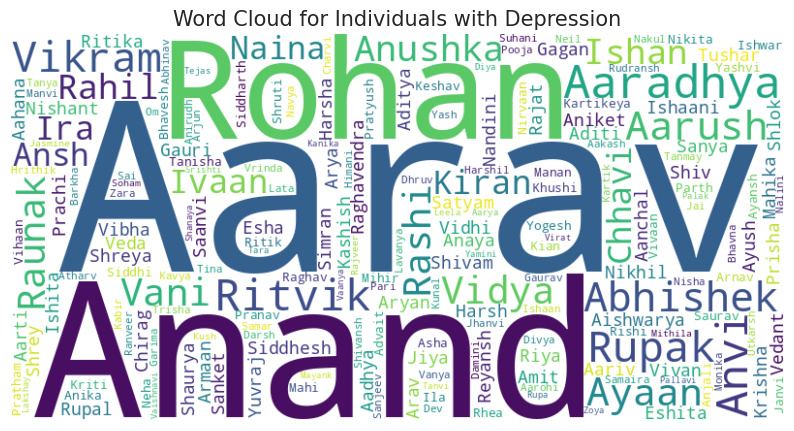

In [438]:
depressed_names = data[data['Depression'] == 1]['Name'].dropna()

names_text = " ".join(depressed_names)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(names_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Individuals with Depression", fontsize=15)
plt.show()

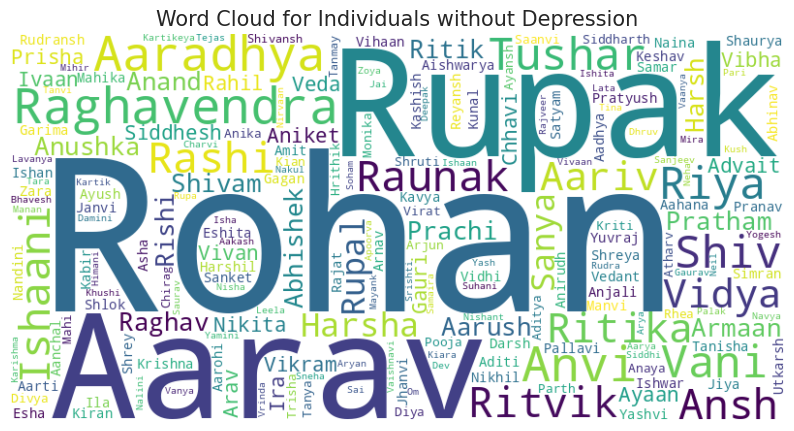

In [440]:
depressed_names = data[data['Depression'] == 0]['Name'].dropna()

names_text = " ".join(depressed_names)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(names_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Individuals without Depression", fontsize=15)
plt.show()

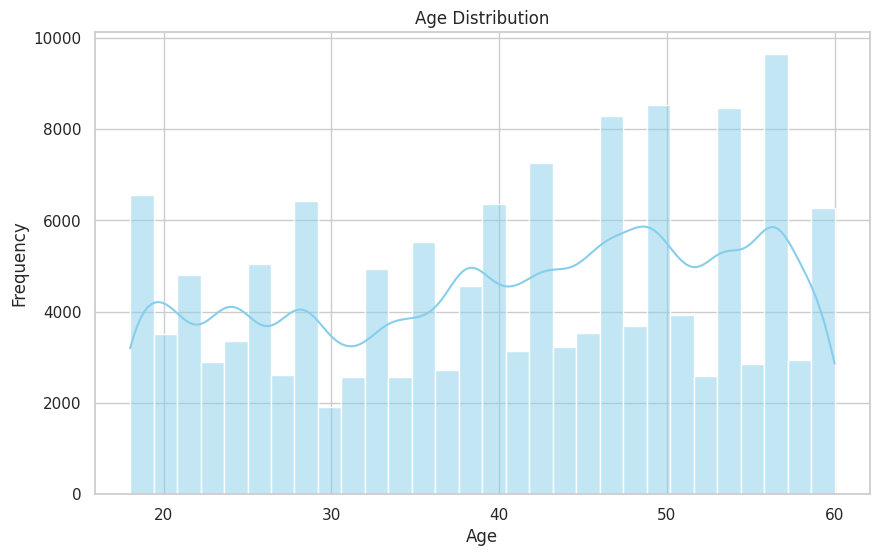

In [384]:
sns.set(style="whitegrid")

# 1. **Visualize 'Age' (Numerical)**
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

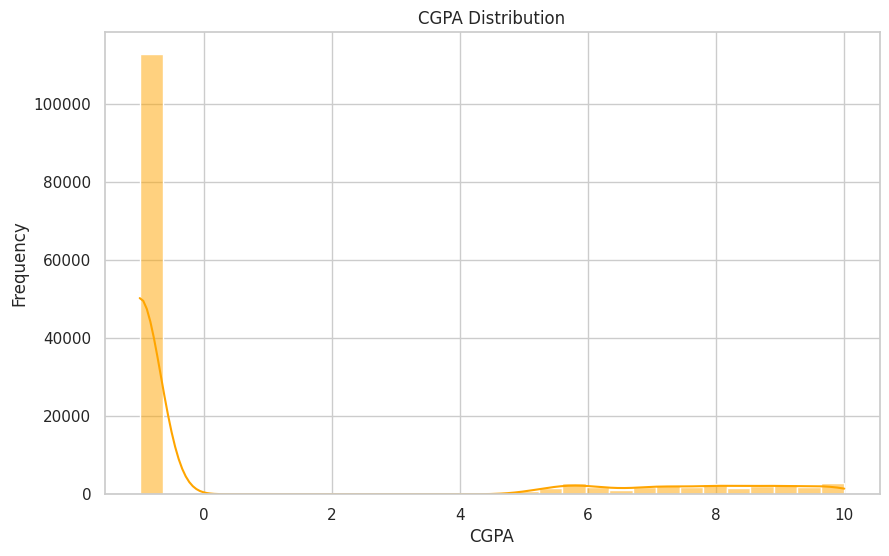

In [385]:
# 2. **Visualize 'CGPA' (Numerical)**
plt.figure(figsize=(10, 6))
sns.histplot(data['CGPA'], bins=30, kde=True, color='orange')
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_1062/3801413825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='Set2')


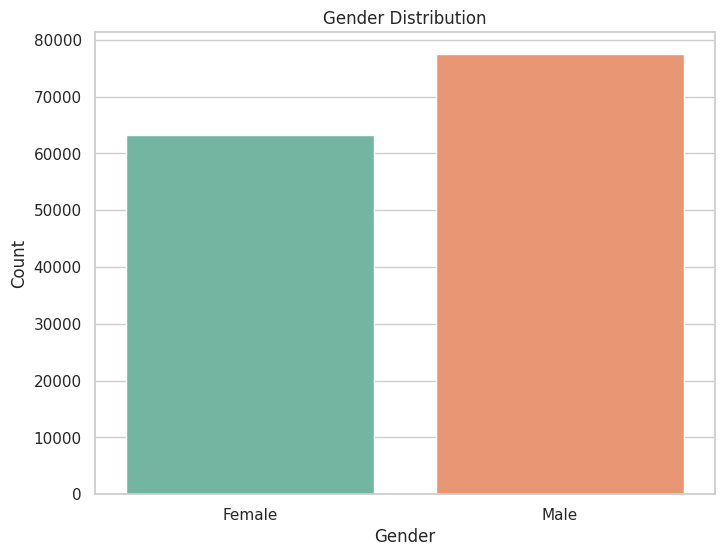

In [386]:
# 3. **Visualize 'Gender' (Categorical)**
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_1062/1924059848.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='City', data=data, palette='Set1')


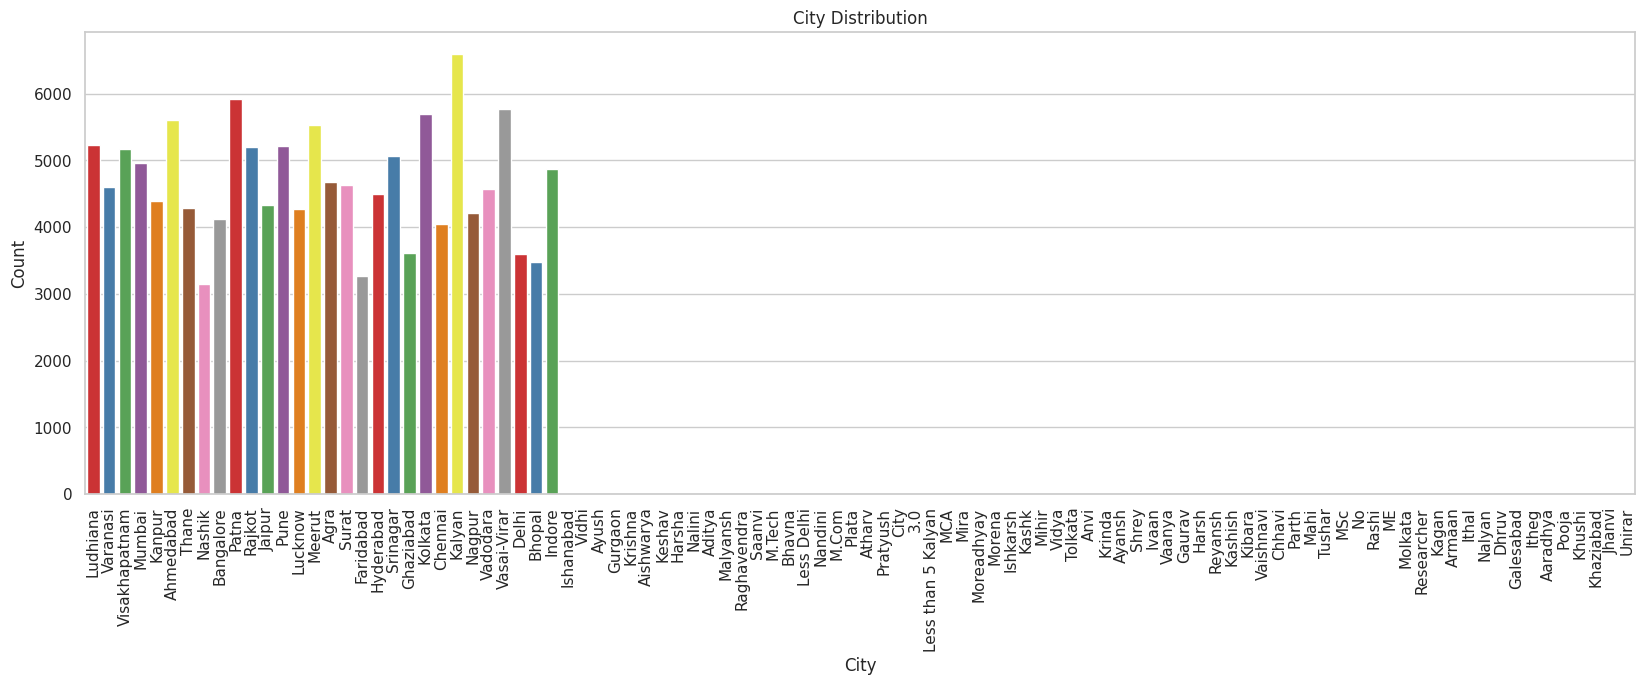

In [387]:
# 4. **Visualize 'City' (Categorical)**
plt.figure(figsize=(20, 6))
sns.countplot(x='City', data=data, palette='Set1')
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_1062/2058550547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Working Professional or Student', data=data, palette='viridis')


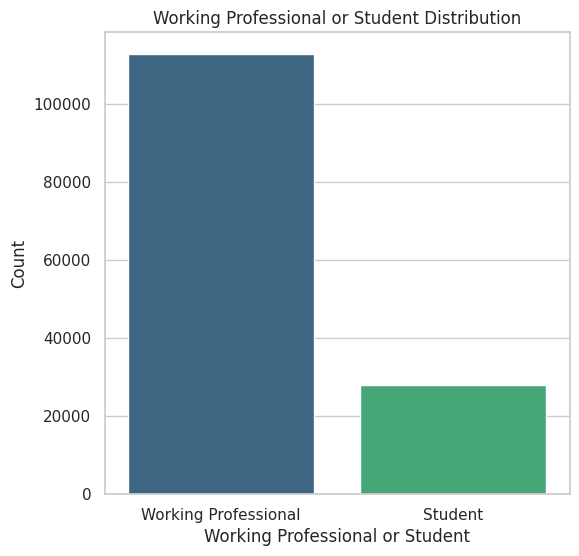

In [388]:
# 5. **Visualize 'Working Professional or Student' (Categorical)**
plt.figure(figsize=(6, 6))
sns.countplot(x='Working Professional or Student', data=data, palette='viridis')
plt.title('Working Professional or Student Distribution')
plt.xlabel('Working Professional or Student')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_1062/2672961362.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Profession', data=data, palette='Pastel1')


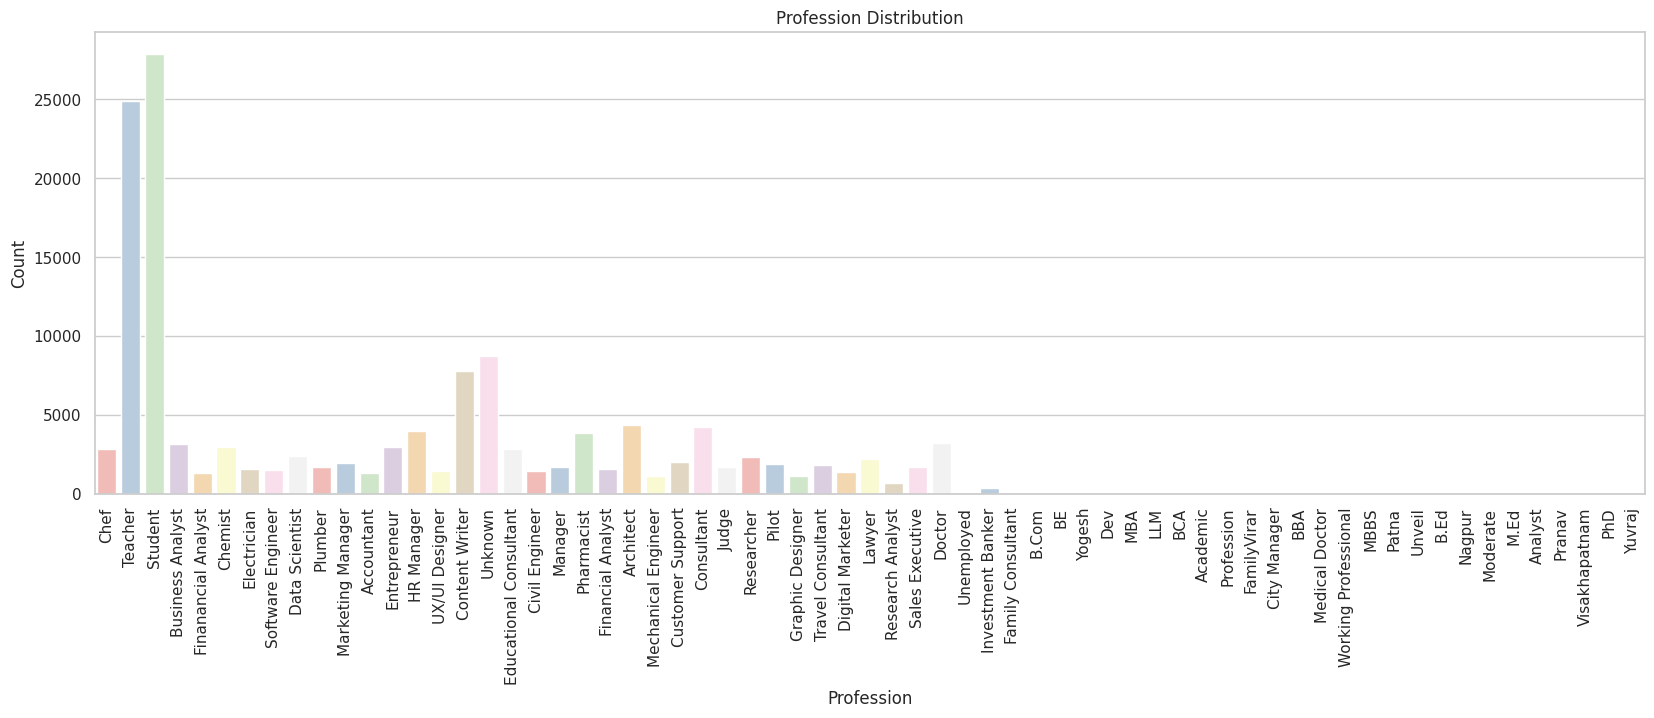

In [389]:
# 6. **Visualize 'Profession' (Categorical)**
plt.figure(figsize=(20, 6))
sns.countplot(x='Profession', data=data, palette='Pastel1')
plt.title('Profession Distribution')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_1062/2016511778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Degree', data=data, palette='magma')


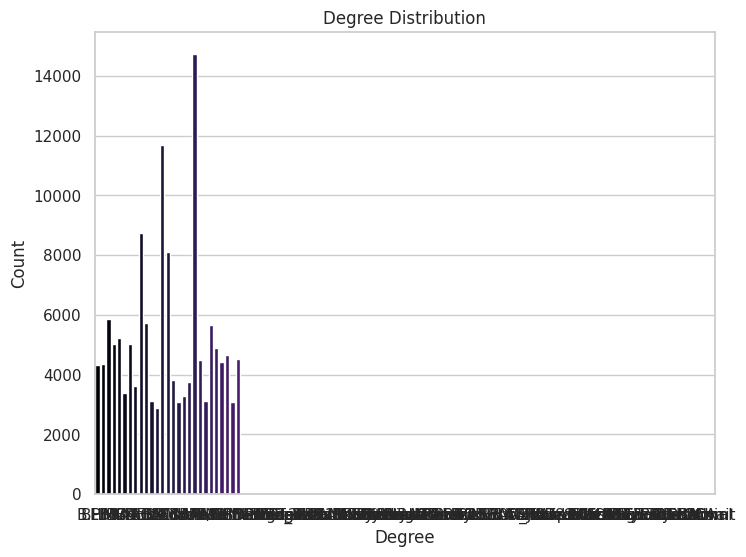

In [390]:
# 7. **Visualize 'Degree' (Categorical)**
plt.figure(figsize=(8, 6))
sns.countplot(x='Degree', data=data, palette='magma')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_1062/1548793077.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Work/Study Hours', data=data, palette='coolwarm')


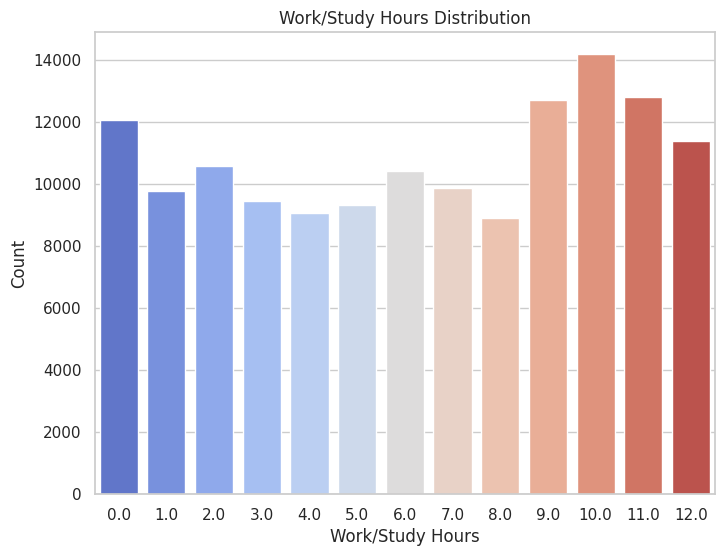

In [391]:
# 8. **Visualize 'Work/Study Hours' (Categorical)**
plt.figure(figsize=(8, 6))
sns.countplot(x='Work/Study Hours', data=data, palette='coolwarm')
plt.title('Work/Study Hours Distribution')
plt.xlabel('Work/Study Hours')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_1062/2818740207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dietary Habits', data=data, palette='YlGnBu')


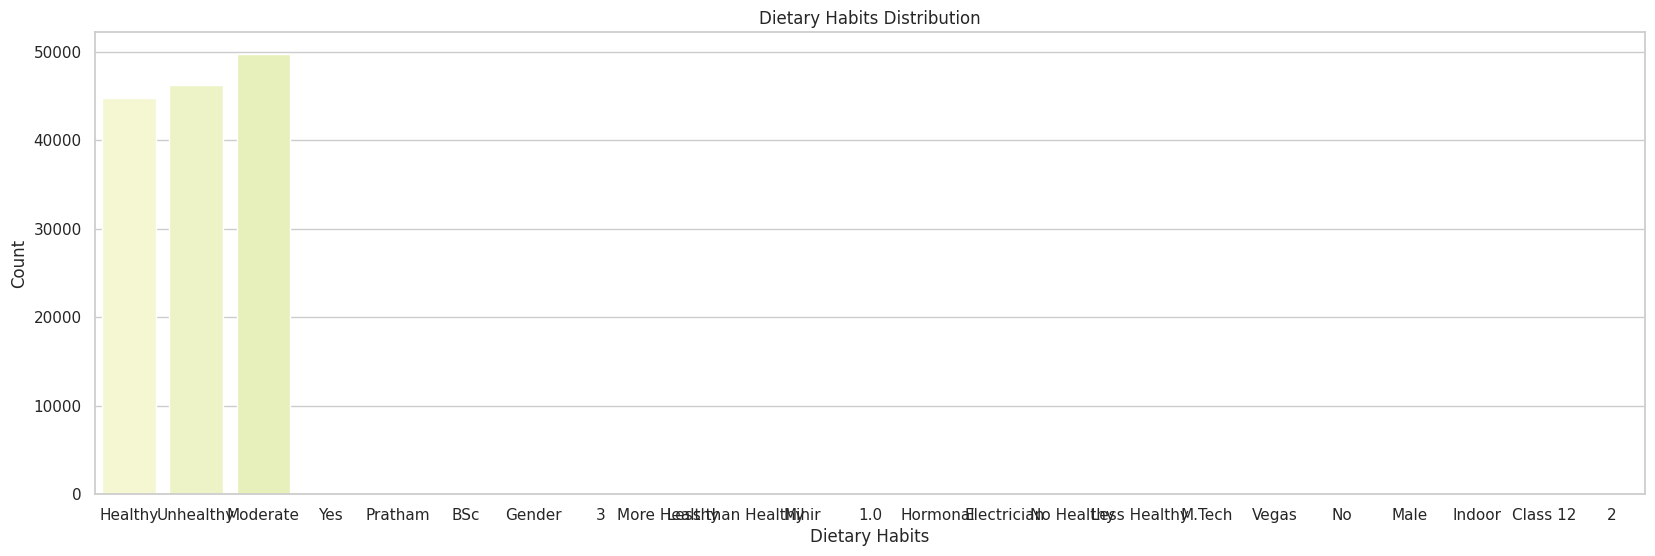

In [392]:
# 9. **Visualize 'Dietary Habits' (Categorical)**
plt.figure(figsize=(20, 6))
sns.countplot(x='Dietary Habits', data=data, palette='YlGnBu')
plt.title('Dietary Habits Distribution')
plt.xlabel('Dietary Habits')
plt.ylabel('Count')
plt.show()

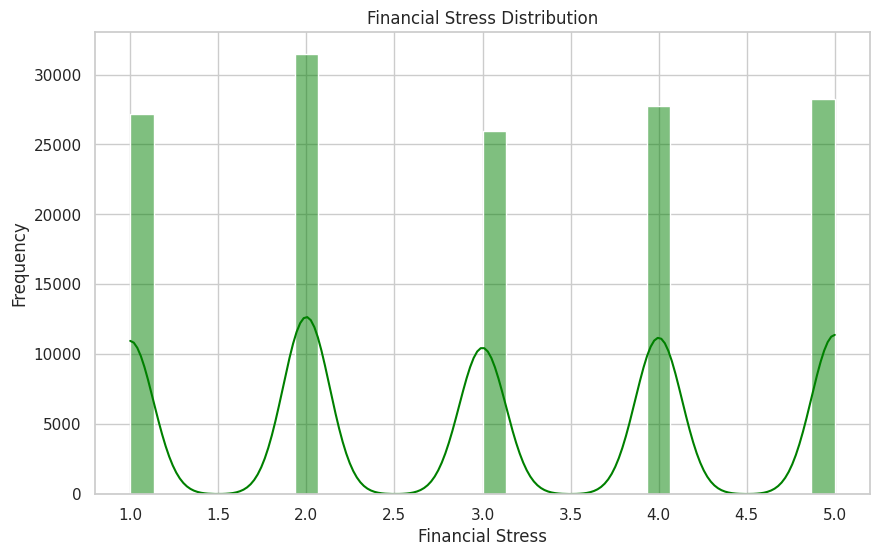

In [393]:
# 10. **Visualize 'Financial Stress' (Numerical)**
plt.figure(figsize=(10, 6))
sns.histplot(data['Financial Stress'], bins=30, kde=True, color='green')
plt.title('Financial Stress Distribution')
plt.xlabel('Financial Stress')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_1062/105485090.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Family History of Mental Illness', data=data, palette='cool')


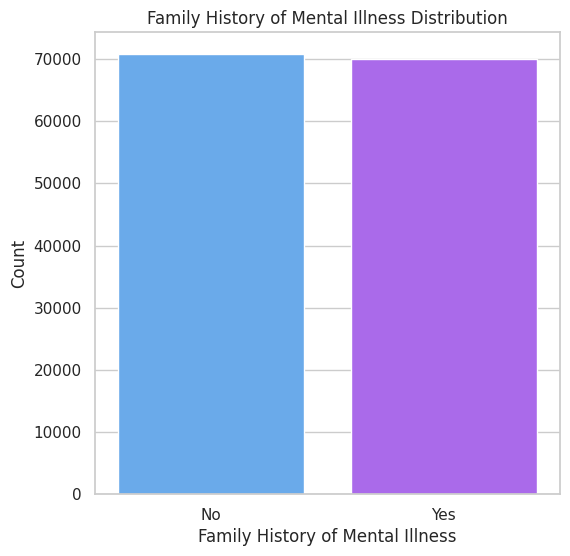

In [394]:
# 11. **Visualize 'Family History of Mental Illness' (Categorical)**
plt.figure(figsize=(6, 6))
sns.countplot(x='Family History of Mental Illness', data=data, palette='cool')
plt.title('Family History of Mental Illness Distribution')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Count')
plt.show()

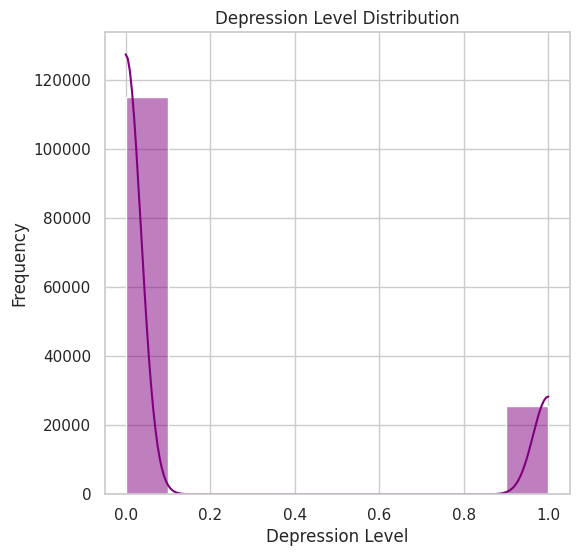

In [395]:
# 12. **Visualize 'Depression' (Numerical)**
plt.figure(figsize=(6, 6))
sns.histplot(data['Depression'], bins=10, kde=True, color='purple')
plt.title('Depression Level Distribution')
plt.xlabel('Depression Level')
plt.ylabel('Frequency')
plt.show()

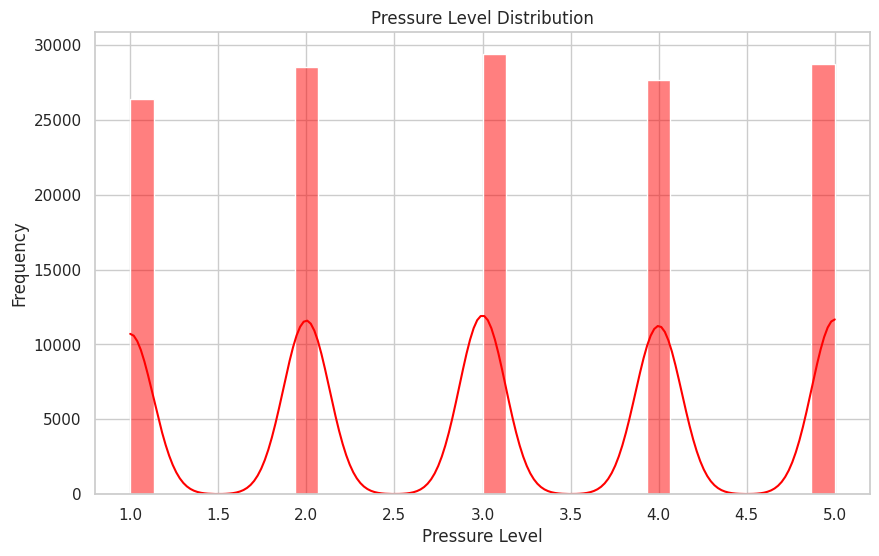

In [396]:
# 13. **Visualize 'Pressure' (Numerical)**
plt.figure(figsize=(10, 6))
sns.histplot(data['Pressure'], bins=30, kde=True, color='red')
plt.title('Pressure Level Distribution')
plt.xlabel('Pressure Level')
plt.ylabel('Frequency')
plt.show()

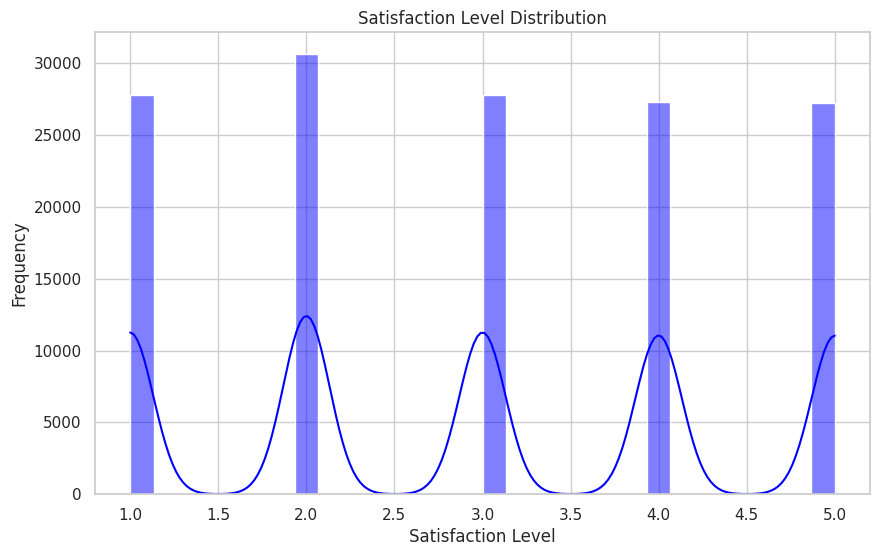

In [397]:
# 14. **Visualize 'Satisfaction' (Numerical)**
plt.figure(figsize=(10, 6))
sns.histplot(data['Satisfaction'], bins=30, kde=True, color='blue')
plt.title('Satisfaction Level Distribution')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_1062/1878335154.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Satisfaction', data=data, palette='YlGnBu')


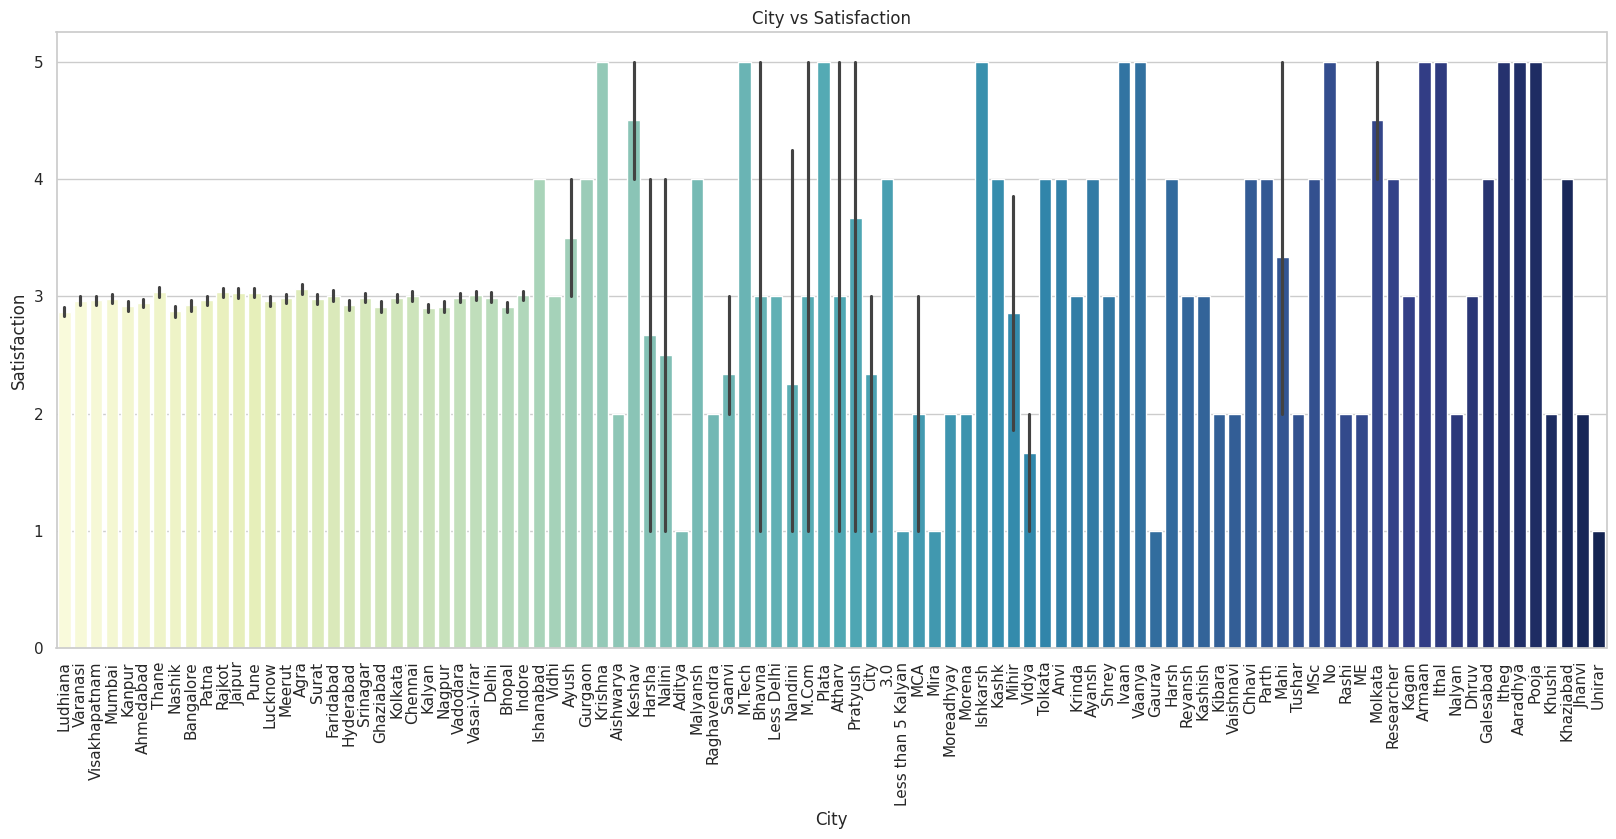

In [400]:
# 3. **Visualize relationship between 'City' and 'Satisfaction' using Bar Plot**
plt.figure(figsize=(20, 8))
sns.barplot(x='City', y='Satisfaction', data=data, palette='YlGnBu')
plt.title('City vs Satisfaction')
plt.xlabel('City')
plt.ylabel('Satisfaction')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_1062/4119266797.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Working Professional or Student', y='Financial Stress', data=data, palette='magma')


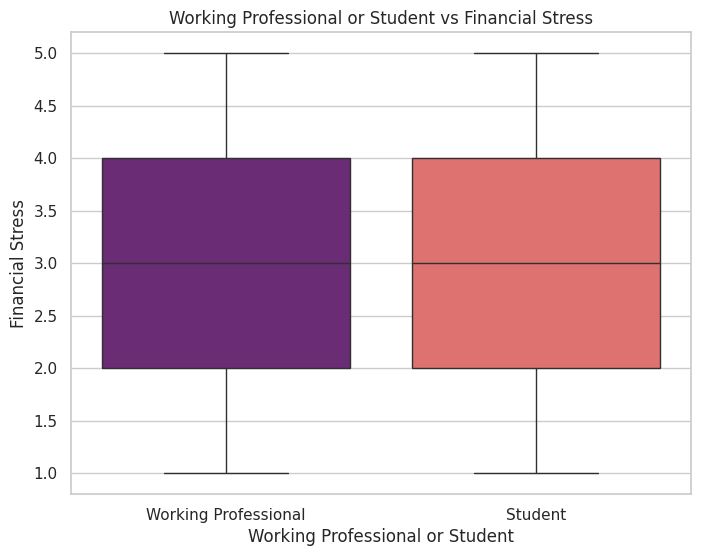

In [401]:
# 4. **Visualize relationship between 'Working Professional or Student' and 'Financial Stress' using Box Plot**
plt.figure(figsize=(8, 6))
sns.boxplot(x='Working Professional or Student', y='Financial Stress', data=data, palette='magma')
plt.title('Working Professional or Student vs Financial Stress')
plt.xlabel('Working Professional or Student')
plt.ylabel('Financial Stress')
plt.show()

/tmp/ipykernel_1062/1096982051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profession', y='Pressure', data=data, palette='Set1')


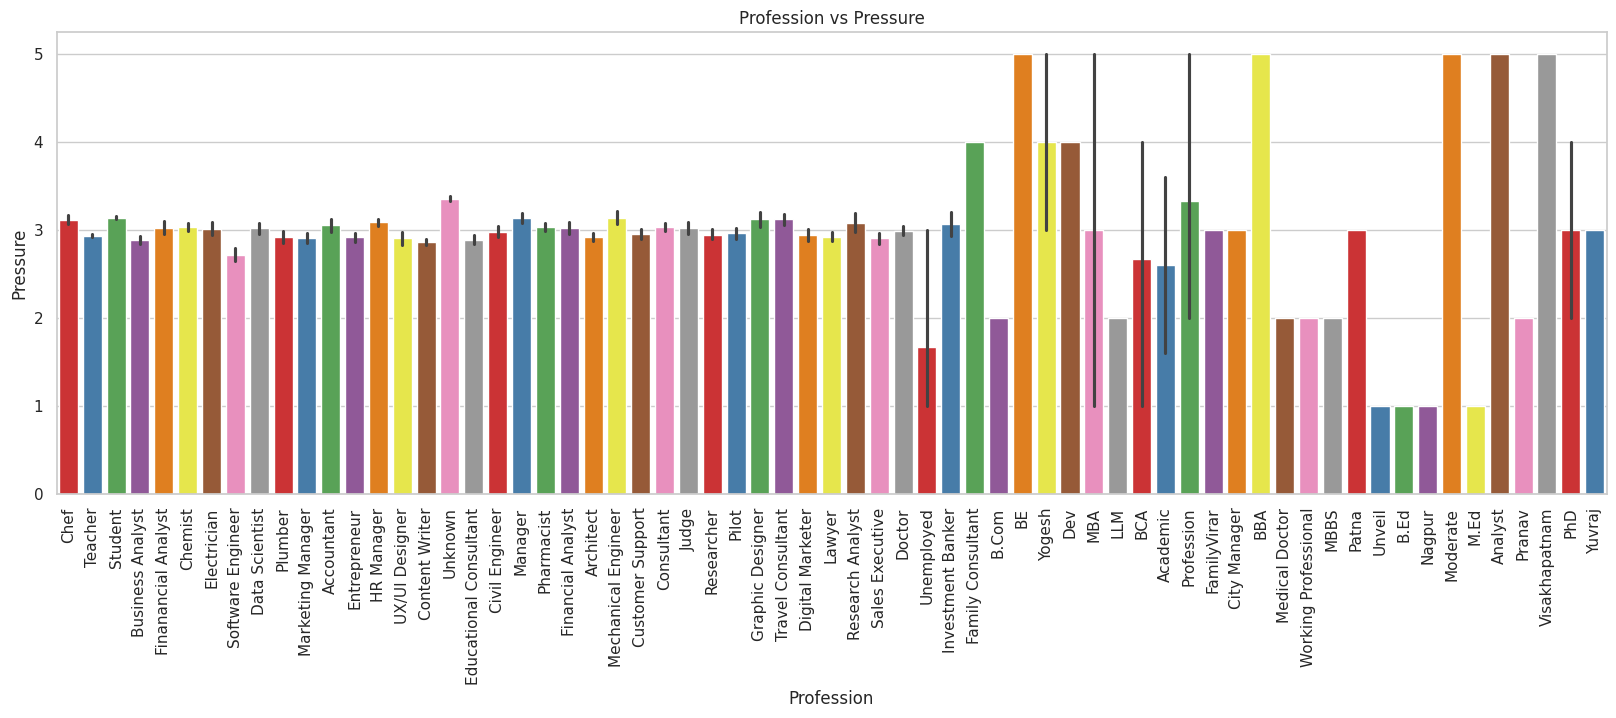

In [402]:
# 5. **Visualize relationship between 'Profession' and 'Pressure' using Bar Plot**
plt.figure(figsize=(20, 6))
sns.barplot(x='Profession', y='Pressure', data=data, palette='Set1')
plt.title('Profession vs Pressure')
plt.xlabel('Profession')
plt.ylabel('Pressure')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_1062/2905521307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dietary Habits', y='Age', data=data, palette='coolwarm')


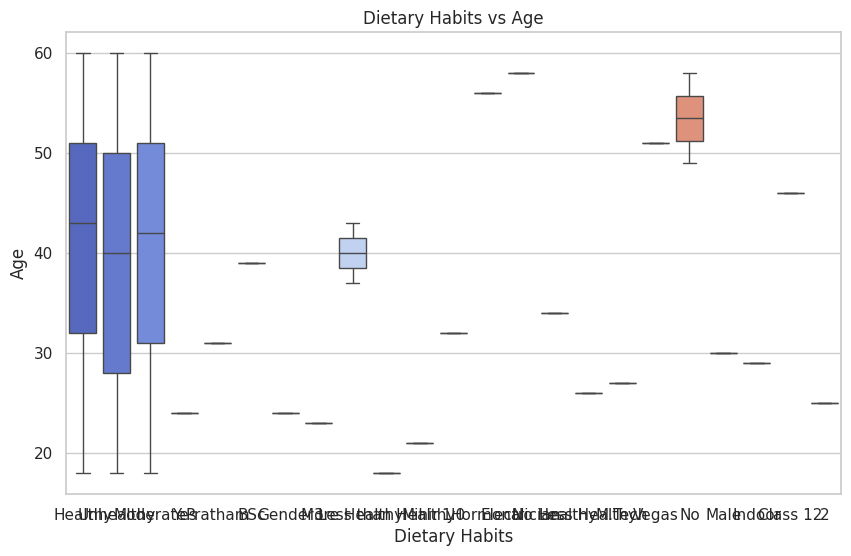

In [403]:
# 6. **Visualize relationship between 'Dietary Habits' and 'Age' using Box Plot**
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dietary Habits', y='Age', data=data, palette='coolwarm')
plt.title('Dietary Habits vs Age')
plt.xlabel('Dietary Habits')
plt.ylabel('Age')
plt.show()

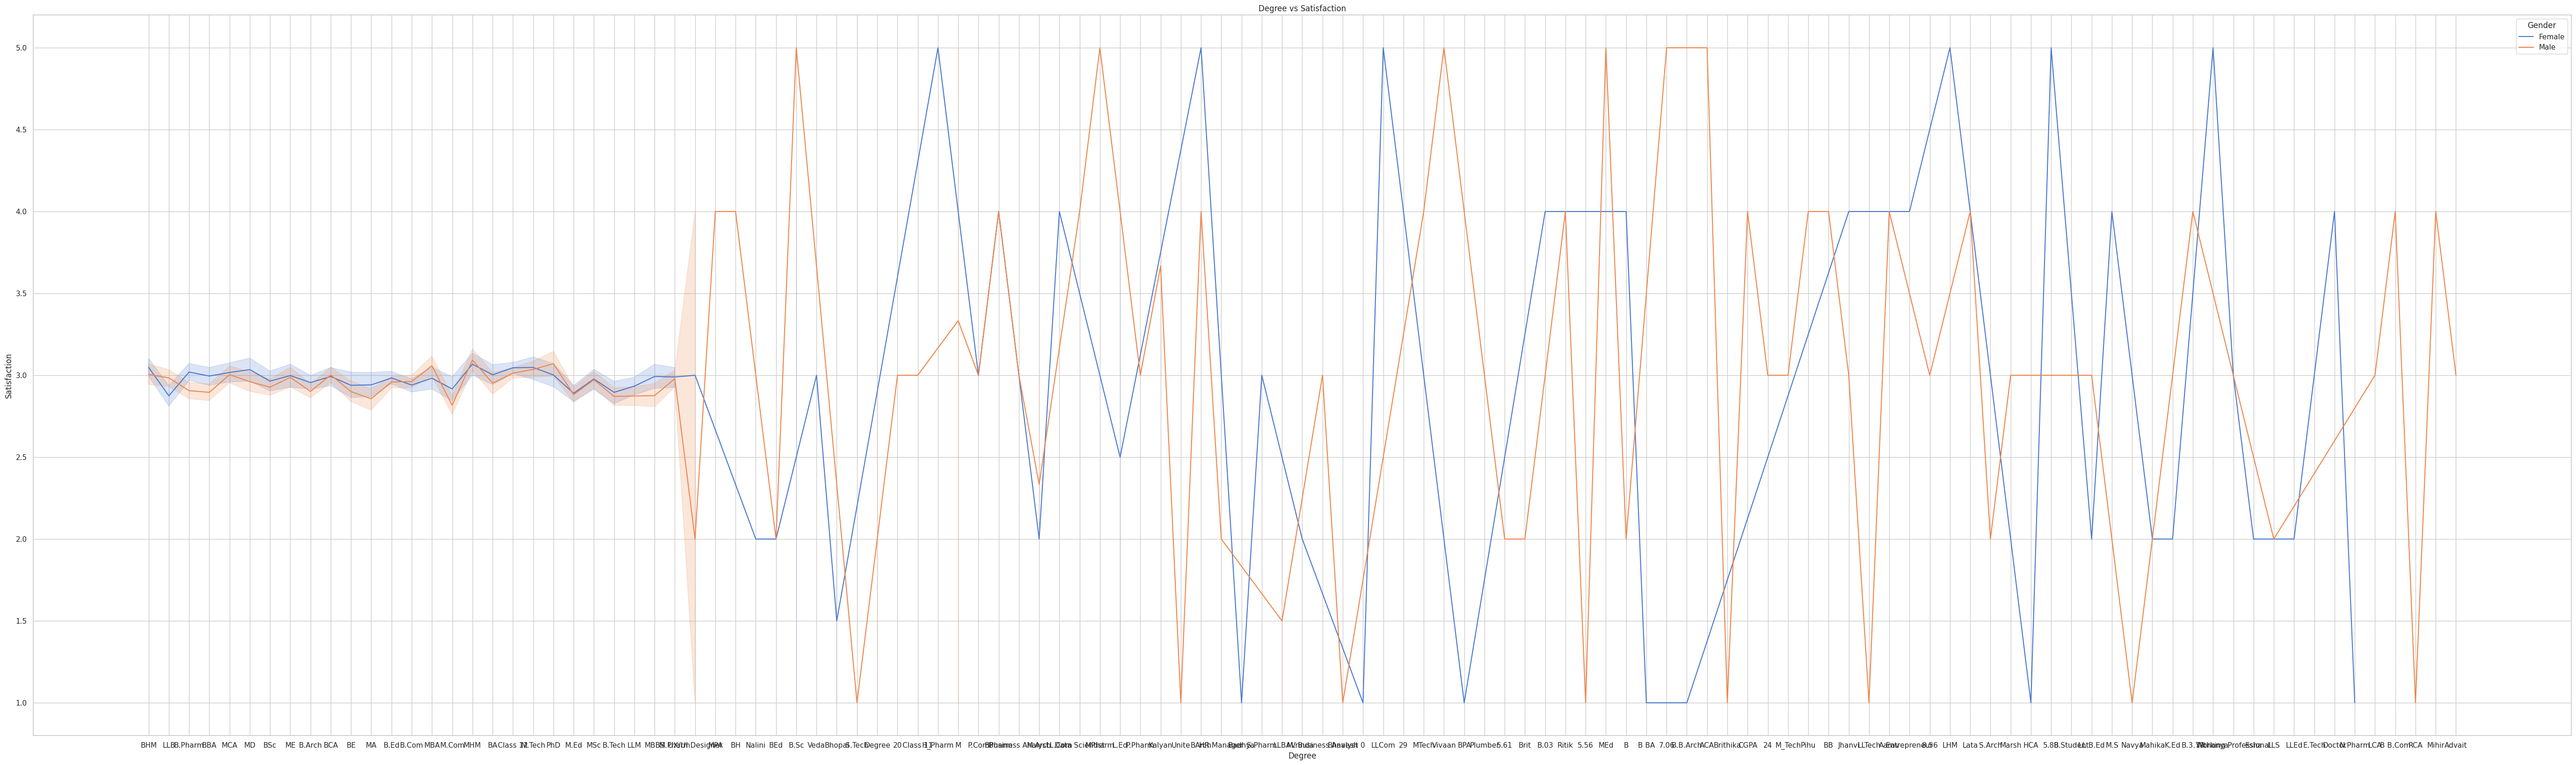

In [404]:
# 7. **Visualize relationship between 'Degree' and 'Satisfaction' using Line Plot**
plt.figure(figsize=(70, 20))
sns.lineplot(x='Degree', y='Satisfaction', data=data, hue='Gender', palette='muted', markers=True)
plt.title('Degree vs Satisfaction')
plt.xlabel('Degree')
plt.ylabel('Satisfaction')
plt.show()

/tmp/ipykernel_1062/1443541359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Depression', data=data, palette='Pastel1')


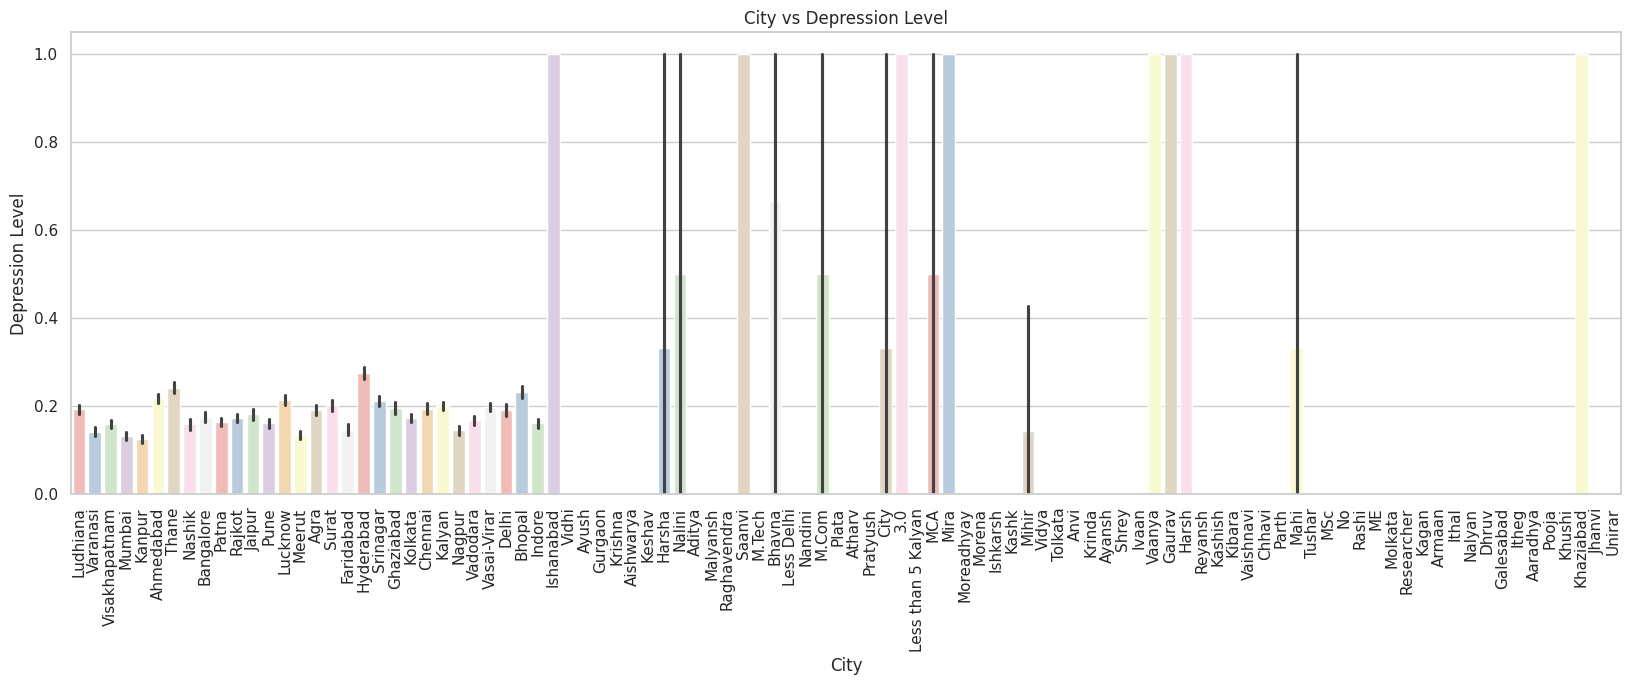

In [405]:
# 8. **Visualize relationship between 'City' and 'Depression' using Bar Plot**
plt.figure(figsize=(20, 6))
sns.barplot(x='City', y='Depression', data=data, palette='Pastel1')
plt.title('City vs Depression Level')
plt.xlabel('City')
plt.ylabel('Depression Level')
plt.xticks(rotation=90)
plt.show()

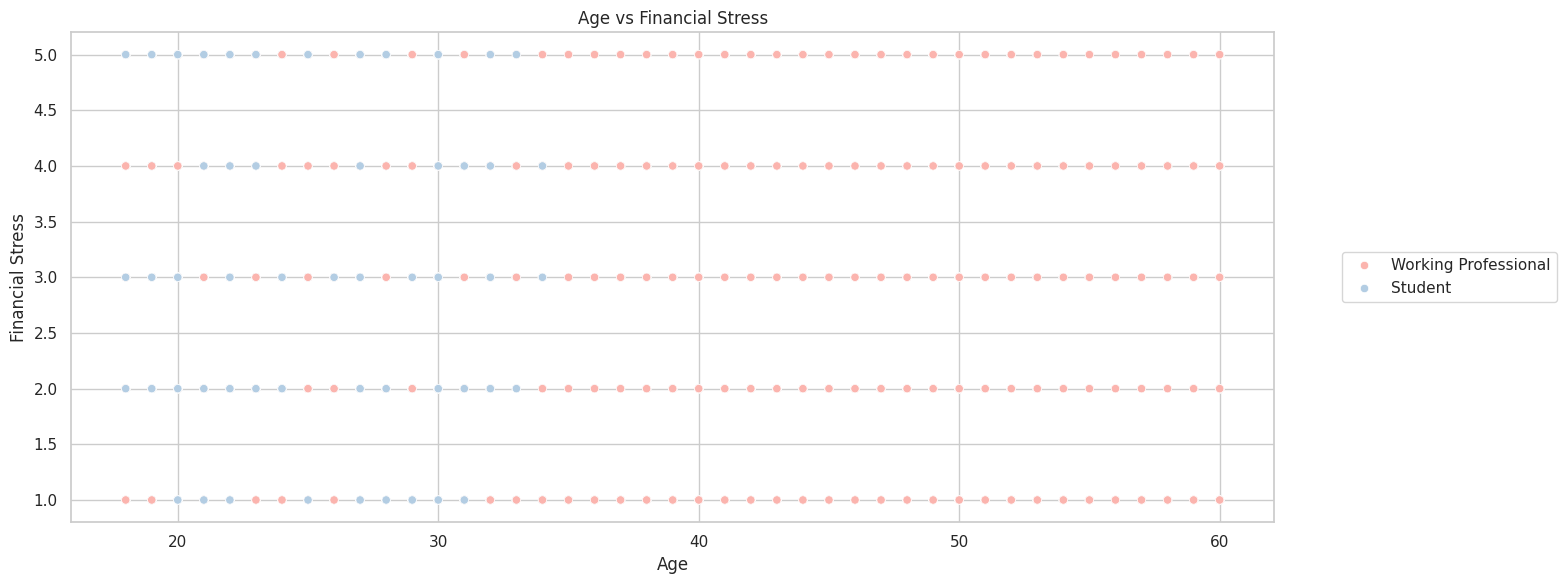

In [435]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Age', y='Financial Stress', data=data, 
                hue='Working Professional or Student', palette='Pastel1')

plt.title('Age vs Financial Stress')
plt.xlabel('Age')
plt.ylabel('Financial Stress')

plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.tight_layout(rect=[0,0,0.8,1])  # Adjust layout

plt.show()

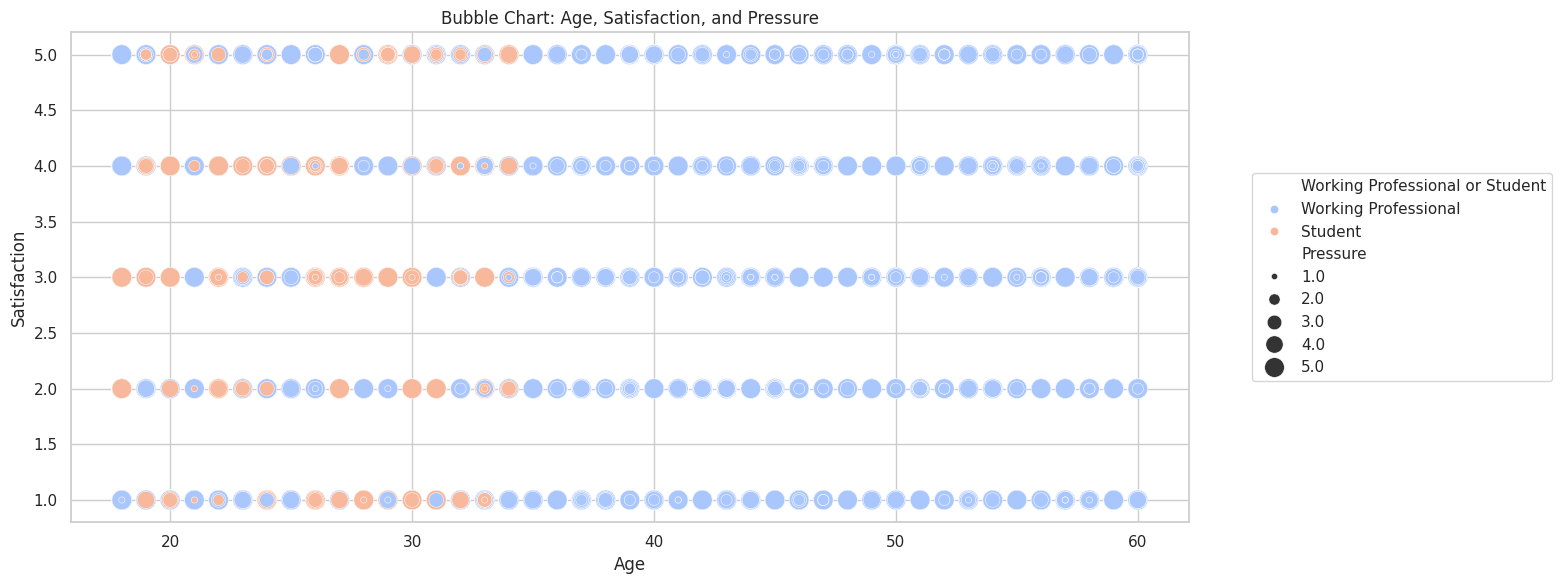

In [433]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Age', y='Satisfaction', size='Pressure', data=data, 
                hue='Working Professional or Student', palette='coolwarm', 
                sizes=(20, 200))

plt.title('Bubble Chart: Age, Satisfaction, and Pressure')
plt.xlabel('Age')
plt.ylabel('Satisfaction')

plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.tight_layout(rect=[0,0,0.8,1])  # Adjust layout

plt.show()

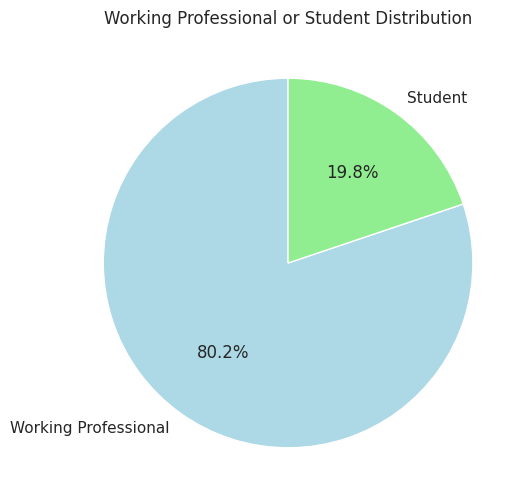

In [408]:
# 11. **Pie Chart for 'Working Professional or Student' distribution**
plt.figure(figsize=(6, 6))
data['Working Professional or Student'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Working Professional or Student Distribution')
plt.ylabel('')
plt.show()

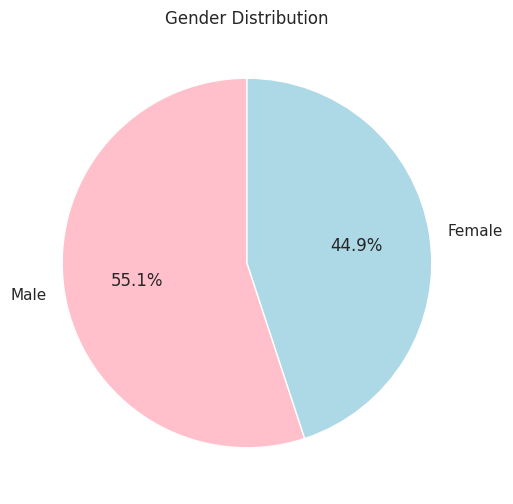

In [409]:
# 12. **Pie Chart for 'Gender' distribution**
plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['pink', 'lightblue'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


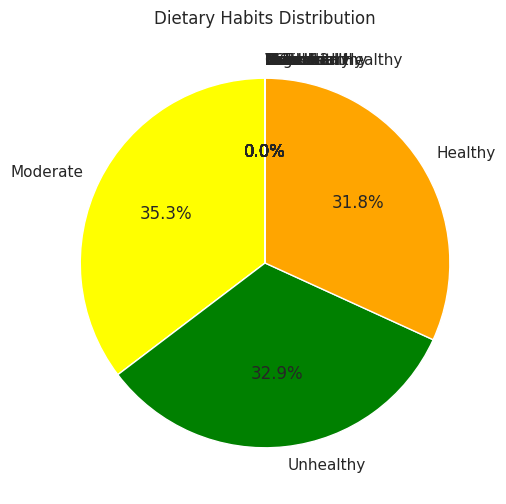

In [410]:
# 13. **Pie Chart for 'Dietary Habits' distribution**
plt.figure(figsize=(6, 6))
data['Dietary Habits'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['yellow', 'green', 'orange'])
plt.title('Dietary Habits Distribution')
plt.ylabel('')
plt.show()

In [422]:
# Initialize geolocator
geolocator = Nominatim(user_agent="city_map")

def get_coordinates(city):
    try:
        location = geolocator.geocode(city)
        if location:
            return location.latitude, location.longitude
        else:
            print(f"City not found: {city}")
            return None, None
    except Exception as e:
        print(f"Error geocoding {city}: {e}")
        return None, None


In [423]:
m = folium.Map(location=[20.5937, 78.9629], zoom_start=2)

for city in data['City'].unique():
    latitude, longitude = get_coordinates(city)
    if latitude and longitude:
        folium.Marker([latitude, longitude], popup=city).add_to(m)
m.save('city_distribution_map.html')
    
m


Error geocoding Ludhiana: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Ludhiana&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error geocoding Jaipur: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Jaipur&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error geocoding Srinagar: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Srinagar&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error geocoding Vasai-Virar: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded wi

In [419]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Depression', 'Suicidal Thoughts'])
fig.add_trace(go.Bar(x=data['Depression'].value_counts().index, y=data['Depression'].value_counts()), row=1, col=1)
fig.add_trace(go.Bar(x=data['Have you ever had suicidal thoughts ?'].value_counts().index, y=data['Have you ever had suicidal thoughts ?'].value_counts()), row=1, col=2)
fig.update_layout(title='Target Variable Distribution')
fig.show()

In [424]:
fig = px.imshow(pd.crosstab(data['Gender'], data['Depression']), text_auto=True)
fig.update_layout(title='Gender vs Depression')
fig.show()

fig = px.imshow(pd.crosstab(data['Gender'], data['Have you ever had suicidal thoughts ?']), text_auto=True)
fig.update_layout(title='Gender vs Suicidal thoughts ?')
fig.show()

fig = px.imshow(pd.crosstab(data['Working Professional or Student'], data['Depression']), text_auto=True)
fig.update_layout(title='Profession vs Depression')
fig.show()

fig = px.imshow(pd.crosstab(data['Working Professional or Student'], data['Have you ever had suicidal thoughts ?']), text_auto=True)
fig.update_layout(title='Profession vs Suicidal Thoughts')
fig.show()

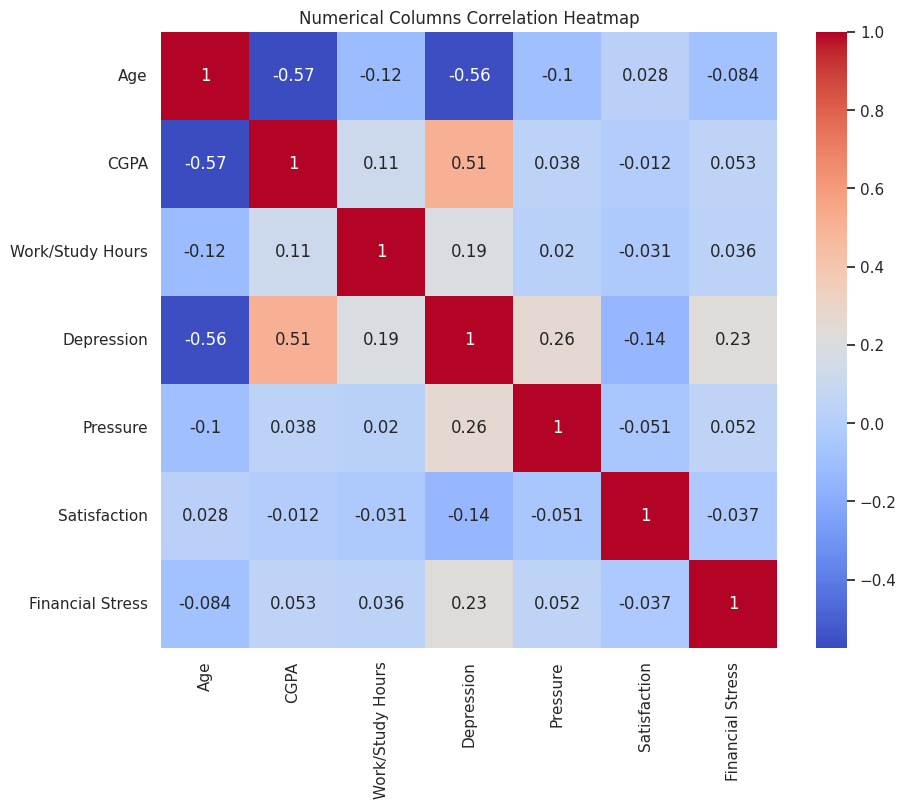

Correlation with Depression:
Depression          1.000000
CGPA                0.514030
Pressure            0.263465
Financial Stress    0.227235
Work/Study Hours    0.191777
Satisfaction       -0.142324
Age                -0.564667
Name: Depression, dtype: float64


In [429]:
numerical_cols = ['Age','CGPA', 'Work/Study Hours', 'Depression', 'Pressure', 'Satisfaction' ,'Financial Stress']
data_num = data[numerical_cols]

corr_matrix = data_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Numerical Columns Correlation Heatmap')
plt.show()

target_corr = corr_matrix['Depression'].sort_values(ascending=False)
print("Correlation with Depression:")
print(target_corr)
